In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data_path = './3rd-ml100marathon-midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')
print(df_train.shape)
print(df_test.shape)

(113, 22)
(33, 21)


In [3]:
# 重組資料成為訓練 / 預測用格式

# poi 這個 column 是只有 train set 才有的 (label)
train_Y = df_train['poi'].values
df_train = df_train.drop(['poi'] , axis=1) #將 column = 'poi' drop 出來
train_num = df_train.shape[0]

df = pd.concat([df_train, df_test])
df = df.drop(['name'], axis=1)
print(df.shape)
df.head(10)

(146, 20)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


### 處理異常欄位
* 有太多Nan的欄位，整欄不使用

In [4]:
print(df.columns)
ratio = 0.4
selected_columns = [] #只留下 非 NaN 值比率大於 ratio 的 columns 
for col in df.columns:
    if (((~df_train[col].isnull()).values.sum())/df.shape[0] > ratio):
        selected_columns.append(col)
print(selected_columns)
df = df[selected_columns]

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'email_address', 'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')
['bonus', 'email_address', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [5]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

0 Integer Features : []

13 Float Features : ['bonus', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']

1 Object Features : ['email_address']


### Category Encoding

In [6]:
#name 是key 所以不處理
#對 email_address 做 LabelEncoder

df['email_address'] = df['email_address'].fillna('None')
df['email_address'] = LabelEncoder().fit_transform(df['email_address'])

In [7]:
df.head(10)

,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,56,19794175.0,46950.0,18.0,42.0,4.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,36,19250000.0,29336.0,108.0,88.0,30.0,22122.0,6843672.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,83,1624396.0,22884.0,39.0,13.0,14.0,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,73,NaN,118134.0,NaN,NaN,NaN,907502.0,985032.0,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,10,NaN,35818.0,144.0,199.0,25.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,45,30766064.0,77978.0,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,98,8308552.0,53947.0,NaN,NaN,NaN,147950.0,3576206.0,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,111,NaN,16514.0,40.0,240.0,11.0,101740.0,698242.0,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,57,34348384.0,99832.0,36.0,123.0,16.0,10359729.0,14761694.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,4,384728.0,125978.0,16.0,52.0,6.0,200308.0,393818.0,274975.0,874.0,873.0,1272284.0,778546.0


### 觀察每個 Float 欄位的分佈

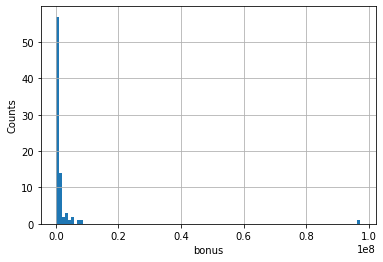

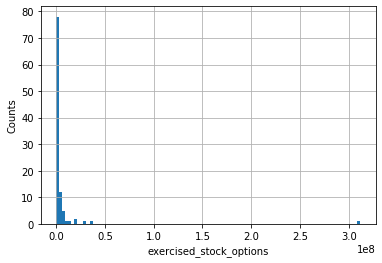

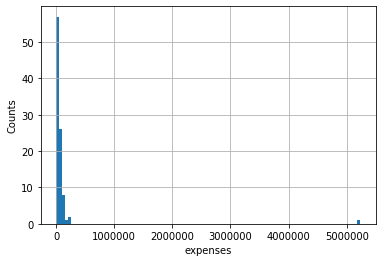

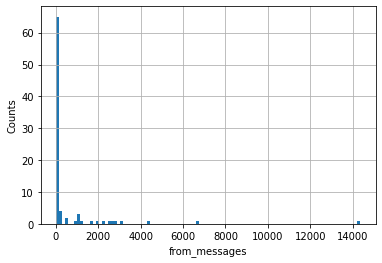

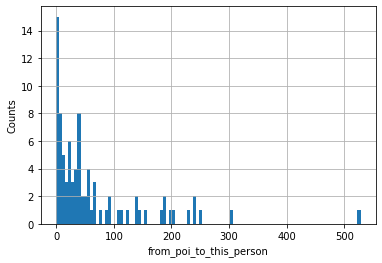

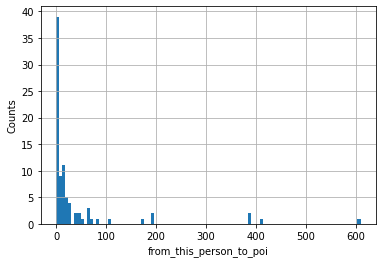

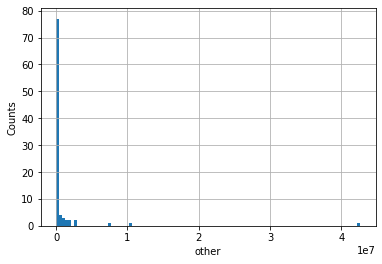

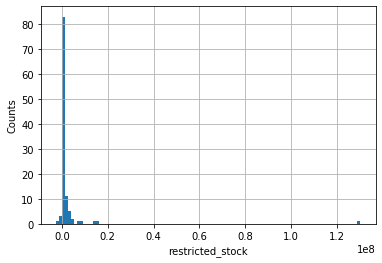

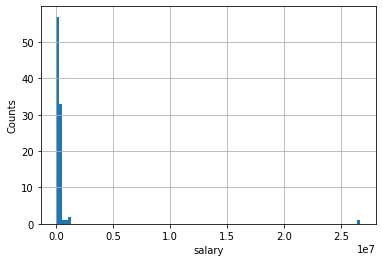

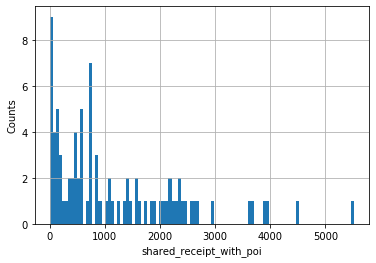

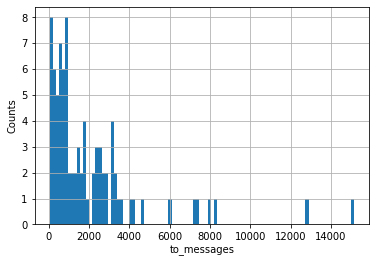

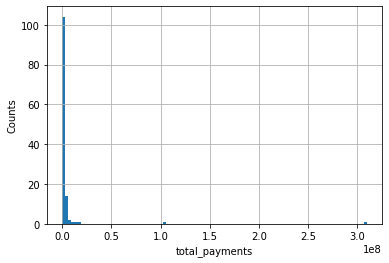

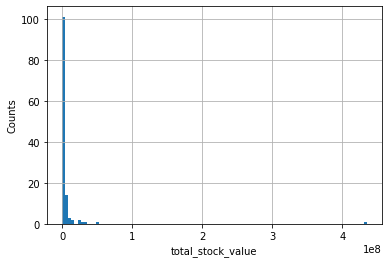

In [8]:
#畫出每個 Float Feature 的分布

ncols = 1;
nrows = len(float_features)
ind = 0
for f in float_features:
    plt.figure(num=ind)
    ind += 1
    s_tmp = df[f][(~df[f].isnull())] #拿非NaN 的來算統計    
    s_tmp.hist(bins = 100)
    plt.ylabel('Counts')
    plt.xlabel(f)
plt.show() 

### 處理 Outlier

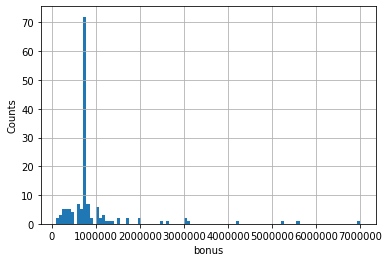

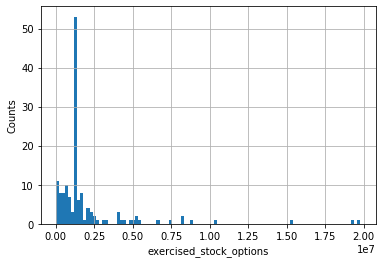

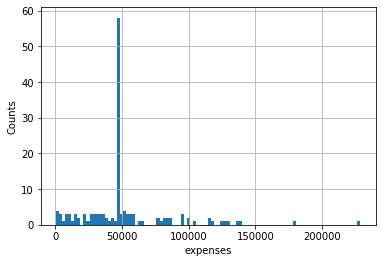

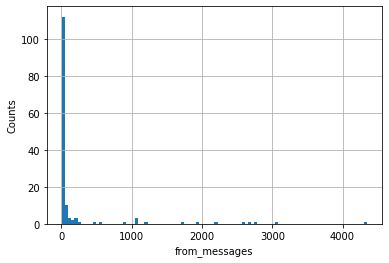

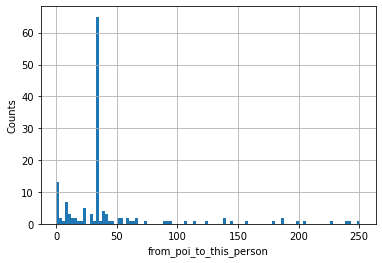

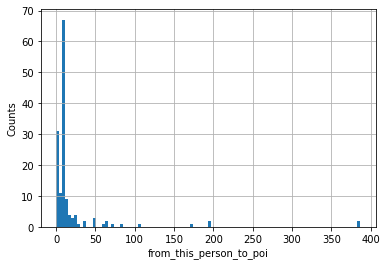

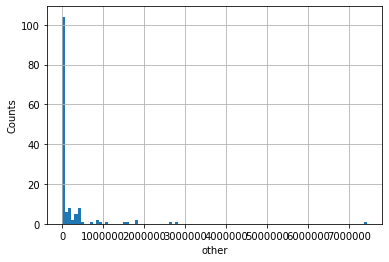

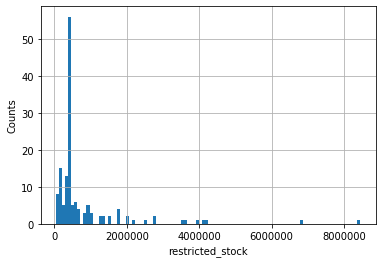

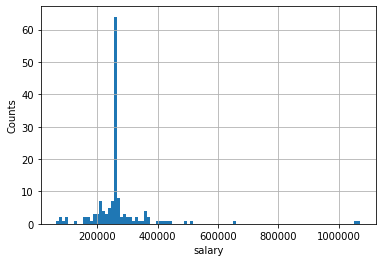

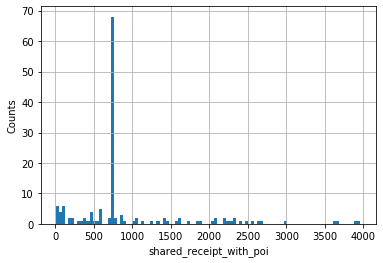

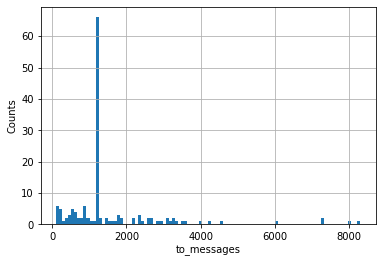

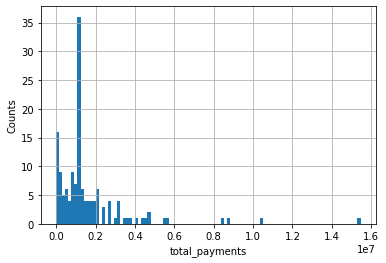

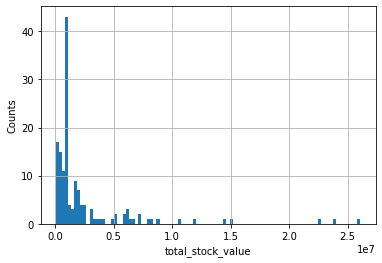

In [9]:
#對於每個 Float Feature 的分布，去除篇移值(用中位數替代)

ncols = 1;
nrows = len(float_features)
ind = 0
for f in float_features:
    plt.figure(num=ind)
    ind += 1
    s_tmp = df[f][(~df[f].isnull())] #拿非NaN 的來算統計
    md = s_tmp.median()
    new_series = df[f].copy()
    new_series[df[f].isnull()] = md #nan 值用中位數取代
    
    thr_u = s_tmp.quantile(0.98) #upper 
    thr_l = s_tmp.quantile(0.02) #lower
    new_series[new_series>thr_u] = md 
    new_series[new_series<thr_l] = md
    
    new_series.hist(bins = 100)
    plt.ylabel('Counts')
    plt.xlabel(f)
    
    df[f] = new_series #將處理後的 Series 塞回去原本的 DataFrame
plt.show() 

In [10]:
df.head(10)

,bonus,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,56,19794175.0,46950.0,18.0,42.0,4.0,174839.0,2748364.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,36,19250000.0,29336.0,108.0,88.0,30.0,22122.0,6843672.0,259996.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,83,1624396.0,22884.0,39.0,13.0,14.0,1573324.0,869220.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,73,1310813.5,118134.0,41.0,35.0,8.0,907502.0,985032.0,224305.0,740.5,1211.0,2652612.0,985032.0
4,1250000.0,10,1310813.5,35818.0,144.0,199.0,25.0,486.0,126027.0,240189.0,2188.0,2598.0,1639297.0,126027.0
5,769375.0,45,1310813.5,77978.0,41.0,35.0,8.0,2856.0,451740.0,259996.0,740.5,1211.0,91093.0,1102872.5
6,769375.0,98,8308552.0,53947.0,41.0,35.0,8.0,147950.0,3576206.0,158403.0,740.5,1211.0,360300.0,11884758.0
7,1200000.0,111,1310813.5,16514.0,40.0,240.0,11.0,101740.0,698242.0,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,57,1310813.5,99832.0,36.0,123.0,16.0,52382.0,451740.0,1072321.0,2411.0,4273.0,1101393.0,1102872.5
9,600000.0,4,384728.0,125978.0,16.0,52.0,6.0,200308.0,393818.0,274975.0,874.0,873.0,1272284.0,778546.0


### Traning  (baseline)
* Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
# 13 = 3 + 3 + 3 + 4  (positive)
# 100 = 25 + 25 + 25 + 25 (negative)
# 建立 indicate set

ind_1 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(3):
    ind_1[i] = True;
for i in range(start_ind, start_ind+25):
    ind_1[i] = True
    
ind_2 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(3, 6):
    ind_2[i] = True;
for i in range(start_ind+25, start_ind+50):
    ind_2[i] = True;
    
ind_3 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(6, 9):
    ind_3[i] = True;
for i in range(start_ind+50, start_ind+75):
    ind_3[i] = True;

ind_4 = np.zeros((113), dtype=bool)
start_ind = 13 #開始 negative
for i in range(9, 13):
    ind_4[i] = True;
for i in range(start_ind+75, start_ind+100):
    ind_4[i] = True;

In [13]:
indices = [ind_1, ind_2, ind_3, ind_4]
for i in range(len(indices)):
    print('i=%d \n'%i, indices[i])

i=0 
 [ True  True  True False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
i=1 
 [False False False  True  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True 

In [14]:
log_reg  = LogisticRegression(solver='newton-cg')

train_X = df[:train_num].values


# Cross Validation  (K-fold)
acc = 0
# 訓練模型
for i in range(len(indices)):
    train_ind = ~indices[i]
    test_ind = indices[i]
    train_X_i = train_X[train_ind]
    train_Y_i = train_Y[train_ind]
    log_reg.fit(train_X_i, train_Y_i)

    x_test_i = train_X[test_ind] #取 df 後半段為 test
    y_test_i = train_Y[test_ind]
    y_pred_i = log_reg.predict(x_test_i)
    acc_i = metrics.accuracy_score(y_test_i, y_pred_i)
    acc += acc_i/len(indices)
print("Accuracy: ", acc)

# # 預測測試集
#注意 logistic regression 的預測輸出，第一個column 是 0 的機率，第二個 column 是 1 的機率




c:\users\raoblack\documents\100ai\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\users\raoblack\documents\100ai\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Accuracy:  0.8315886699507389


c:\users\raoblack\documents\100ai\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
c:\users\raoblack\documents\100ai\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [15]:
#拿全部的資料來 Train
# log_reg.fit(train_X, train_Y)
# y_pred = log_reg.predict(train_X)
# acc = metrics.accuracy_score(y_pred, train_Y)
# print('acc = %.5f '%acc)

### 建立Kaggle submission

In [16]:
test_X = df[train_num:].values
y_pred_prob = log_reg.predict_proba(test_X)[:, 0]


submission_df = pd.DataFrame()
submission_df['name'] = df_test['name']
submission_df['poi'] = y_pred_prob
print(submission_df)

                    name       poi
0       BELDEN TIMOTHY N  0.999642
1     BOWEN JR RAYMOND M  0.537298
2         HANNON KEVIN P  0.182285
3       DELAINEY DAVID W  1.000000
4       CAUSEY RICHARD A  0.995933
5       HICKERSON GARY J  0.363641
6         FREVERT MARK A  0.006926
7            CHAN RONNIE  0.966344
8   DONAHUE JR JEFFREY M  0.688827
9      REYNOLDS LAWRENCE  0.732511
10      HORTON STANLEY C  1.000000
11         LEWIS RICHARD  0.911144
12    SHERRICK JEFFREY B  0.906346
13        MEYER JEROME J  0.927430
14   DERRICK JR. JAMES V  1.000000
15              PIRO JIM  0.943808
16   DETMERING TIMOTHY J  0.936599
17     KISHKILL JOSEPH G  0.575095
18        BAY FRANKLIN R  0.948304
19        PRENTICE JAMES  0.948111
20                 TOTAL  0.966344
21        FALLON JAMES B  0.702601
22            METTS MARK  0.977821
23         WODRASKA JOHN  0.862490
24   MORDAUNT KRISTINA M  0.968666
25      CARTER REBECCA C  0.933679
26      BHATNAGAR SANJAY  0.999995
27      WALTERS GARE

In [17]:
import time
time_array = time.localtime() # localtime
time_str = time.strftime('%m-%dT%H%M%S', time_array)

submission_filename = 'Result_'+time_str+'.csv'
# submission_df.to_csv(submission_filename, index=False)

public testing set
* Result_10-24T210049.csv  Score:0.5
* Result_10-24T210506.csv  Score:0.50714
* Result_10-24T210953.csv  Score:0.4
* Result_10-24T212633.csv  Score:0.57857